In [2]:
import numpy as np
import itk
import tqdm
import torch

from monai.transforms import CropForeground, SpatialPad, ResizeWithPadOrCrop

In [15]:
def monai_HCP(f_path, desired_shape):
    def process(iA, transform, isSeg=False):
        iA = iA[None, None, :, :, :]
        iA = torch.nn.functional.avg_pool3d(iA, 2)[0]
        iA = iA / torch.max(iA)
        for t in transform:
            iA = t(iA)
        return iA
    image = torch.tensor(np.asarray(itk.imread(f_path)))

    transform = [CropForeground(lambda x: x>0)]
    if desired_shape is not None:
        transform.append(SpatialPad(desired_shape))
    return process(image, transform)

def monai_OAI(f_path, desired_shape):
    def process(iA, transform):
        iA = iA[None, None, :, :, :]
        iA = torch.nn.functional.avg_pool3d(iA, 2)[0]
        iA = transform(iA) if transform is not None else iA
        return iA
    image = torch.tensor(np.asarray(itk.imread(f_path)))

    transform = None
    if desired_shape is not None:
        transform = ResizeWithPadOrCrop(desired_shape)
    return process(image, transform)


In [6]:
with open(f"/playpen-raid2/lin.tian/projects/icon_lung/ICON/training_scripts/brain_t1_pipeline/splits/train.txt") as f:
    image_paths = f.readlines()
f_path = image_paths[0].split(".nii.gz")[0] + "_restore_brain.nii.gz"
img = monai_HCP(f_path, [175, 175, 175])

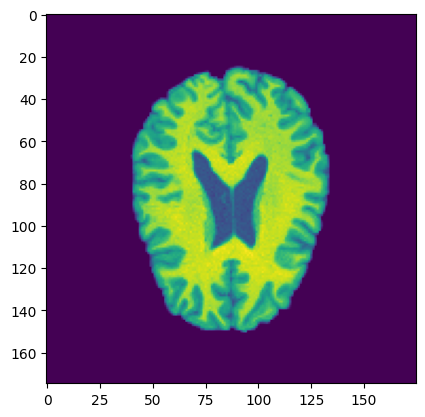

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img[0,100])

In [21]:
with open("/playpen-raid2/lin.tian/projects/icon_lung/ICON/training_scripts/oai_paper_pipeline/splits/train/pair_path_list.txt") as f:
    train_pair_paths = f.readlines()
f_path = train_pair_paths[0].split()[0].replace("playpen/zhenlinx/Data", "playpen-ssd/lin.tian/data_local")
img = monai_OAI(f_path, [175,175,175])

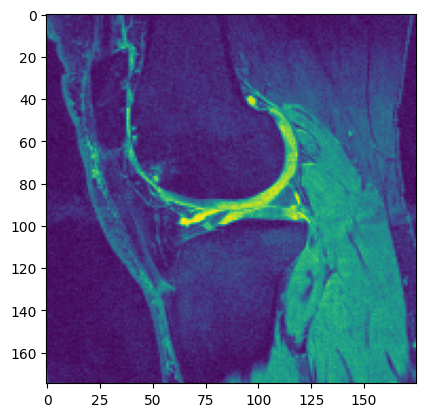

In [23]:
plt.imshow(img[0,100])